In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt
# IMPORTUOTI DARBO PRADZIOJE
# nuosavų funkcijų importavimas:
from manoFunkcijos import *

In [33]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
    )
C=DB.cursor()
# IMPORTUOTI DARBO PRADZIOJE

In [19]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
select lytis, count(*),
avg(bdu_spalio)
from DUS2014N
group by lytis;
"""
C.execute(sql)
ans = C.fetchall()
lytis, kiekis, atlyginimas = list(map(list, zip(*ans)))
#? = np.transpose(ans)

pout(ans)

| 0 |       F        |     22366      |2097.37965841008|
| 1 |       M        |     22586      |2633.69374391215|


In [5]:
from datetime import datetime

In [6]:
from dateutil import parser

In [7]:
# 1) su plot() nubraižykite BrentOilPrices istorinius duomenis. 
# Duomenis imkite iš SQL lentelės BrentOilPrices.
# 2) Pridėkite vartotojo įvestį, kad su input() 
# būtų galima nurodyti metus (nuo, iki), kurių istorinius duomenis norite pamatyti.
# strptime()
# parser.parse()
# 152-153 skaidres 


sql="""
select * from BrentOilPrices;
"""
C.execute(sql)
ans = C.fetchall()
Date, Price = list(map(list, zip(*ans)))

pout(ans)



Rodoma 5 eilutės iš 8360
| 0 |   20-May-87    |     18.63      |
| 1 |   21-May-87    |     18.45      |
| 2 |   22-May-87    |     18.55      |
| 3 |   25-May-87    |      18.6      |
| 4 |   26-May-87    |     18.63      |


In [8]:
naujos_datos = []
for i in Date: 
    parse_data = parser.parse(i).date()
    naujos_datos.append(parse_data)
    
print(naujos_datos)

[datetime.date(1987, 5, 20), datetime.date(1987, 5, 21), datetime.date(1987, 5, 22), datetime.date(1987, 5, 25), datetime.date(1987, 5, 26), datetime.date(1987, 5, 27), datetime.date(1987, 5, 28), datetime.date(1987, 5, 29), datetime.date(1987, 6, 1), datetime.date(1987, 6, 2), datetime.date(1987, 6, 3), datetime.date(1987, 6, 4), datetime.date(1987, 6, 5), datetime.date(1987, 6, 8), datetime.date(1987, 6, 9), datetime.date(1987, 6, 10), datetime.date(1987, 6, 11), datetime.date(1987, 6, 12), datetime.date(1987, 6, 16), datetime.date(1987, 6, 17), datetime.date(1987, 6, 18), datetime.date(1987, 6, 19), datetime.date(1987, 6, 22), datetime.date(1987, 6, 23), datetime.date(1987, 6, 24), datetime.date(1987, 6, 25), datetime.date(1987, 6, 26), datetime.date(1987, 6, 29), datetime.date(1987, 6, 30), datetime.date(1987, 7, 1), datetime.date(1987, 7, 2), datetime.date(1987, 7, 3), datetime.date(1987, 7, 6), datetime.date(1987, 7, 7), datetime.date(1987, 7, 8), datetime.date(1987, 7, 9), datet

In [9]:
print(Price)
print(Date)
print(naujos_datos)

[18.63, 18.45, 18.55, 18.6, 18.63, 18.6, 18.6, 18.58, 18.65, 18.68, 18.75, 18.78, 18.65, 18.75, 18.78, 18.78, 18.68, 18.78, 18.9, 19.03, 19.05, 19.05, 19.1, 18.9, 18.75, 18.7, 19.08, 19.15, 19.08, 18.98, 19.25, 19.33, 19.48, 19.5, 19.48, 19.68, 19.73, 19.83, 19.88, 20.28, 20.4, 20.63, 20.55, 20.35, 20.33, 20.15, 19.58, 19.3, 19.78, 19.98, 20.2, 20.03, 20.95, 20.65, 19.8, 19.75, 19.65, 19.43, 19.45, 19.5, 19.4, 19.25, 18.85, 18.75, 18.5, 18.3, 18.1, 17.48, 17.55, 18.1, 18.28, 18.2, 18.63, 18.43, 18.4, 18.18, 18.13, 17.6, 17.68, 17.9, 18.3, 18.18, 18.15, 18.53, 18.53, 18.43, 18.3, 18.28, 18.48, 18.48, 18.68, 18.6, 18.65, 18.5, 18.48, 18.5, 18.65, 18.78, 18.6, 18.58, 18.63, 18.6, 18.55, 18.55, 18.68, 18.68, 19.0, 19.1, 18.78, 18.93, 19.13, 18.98, 18.75, 18.8, 18.85, 18.75, 18.8, 18.63, 18.38, 17.93, 17.85, 17.95, 17.5, 17.75, 17.8, 17.85, 17.8, 17.68, 17.4, 17.18, 17.48, 17.6, 17.9, 17.83, 17.68, 17.73, 17.78, 17.7, 17.65, 17.7, 17.93, 18.0, 17.78, 17.58, 17.43, 17.55, 17.73, 16.8, 16.2, 

In [11]:
# from datetime import datetime

pradzia = int(input('Pradzios data yyyy-mm-dd'))
pabaiga = int(input('Pabaigos data yyyy-mm-dd'))

vart_datos = []
vart_kainos = []

for d, p in zip(naujos_datos, Price): 
    if  d.year >= pradzia and d.year <= pabaiga:                  #.year istraukia metus 
        vart_datos.append(d)
        vart_kainos.append(p)
               

print(vart_datos)
print(vart_kainos)


[datetime.date(2000, 1, 4), datetime.date(2000, 1, 5), datetime.date(2000, 1, 6), datetime.date(2000, 1, 7), datetime.date(2000, 1, 10), datetime.date(2000, 1, 11), datetime.date(2000, 1, 12), datetime.date(2000, 1, 13), datetime.date(2000, 1, 14), datetime.date(2000, 1, 17), datetime.date(2000, 1, 18), datetime.date(2000, 1, 19), datetime.date(2000, 1, 20), datetime.date(2000, 1, 21), datetime.date(2000, 1, 24), datetime.date(2000, 1, 25), datetime.date(2000, 1, 26), datetime.date(2000, 1, 27), datetime.date(2000, 1, 28), datetime.date(2000, 1, 31), datetime.date(2000, 2, 1), datetime.date(2000, 2, 2), datetime.date(2000, 2, 3), datetime.date(2000, 2, 4), datetime.date(2000, 2, 7), datetime.date(2000, 2, 8), datetime.date(2000, 2, 9), datetime.date(2000, 2, 10), datetime.date(2000, 2, 11), datetime.date(2000, 2, 14), datetime.date(2000, 2, 15), datetime.date(2000, 2, 16), datetime.date(2000, 2, 17), datetime.date(2000, 2, 18), datetime.date(2000, 2, 21), datetime.date(2000, 2, 22), da

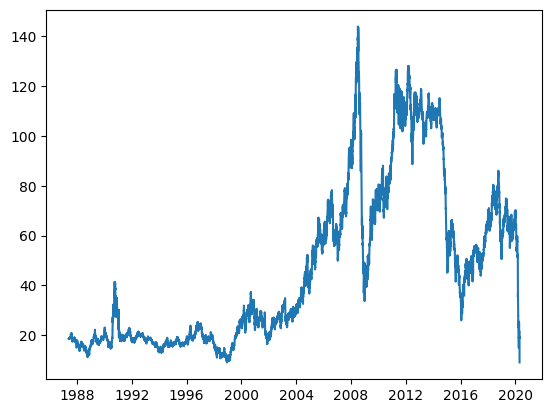

In [12]:
fig, axis = plt.subplots()

axis.plot(naujos_datos, Price)

plt.show()

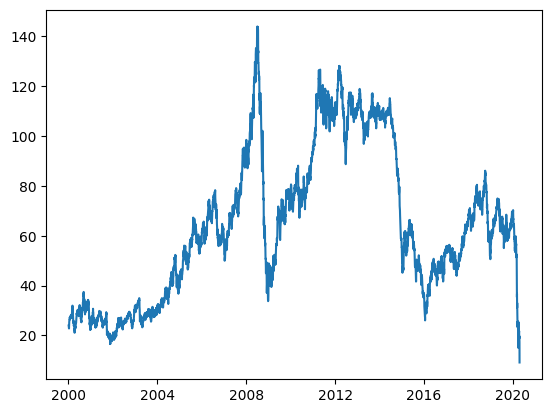

In [16]:
fig, axis = plt.subplots()

axis.plot(vart_datos, vart_kainos)

plt.show()

In [20]:
# EismoĮvykiai - kurį mėnesį įvyko daugiausiai eismo įvykių? 
# Pateikite eismo įvykių kiekius su bar arba barh.
# kuriomis valandomis? Taip pat vizuallizuokite tai su bar arba barh. 
# Stulpelis dataLaikas.


sql="""
SELECT  MONTH(CAST(dataLaikas AS DATE)) as men , count(*) as kiekis  
FROM EismIvyk2021
group by men;
"""
C.execute(sql)
ans = C.fetchall()
men, kiekis = list(map(list, zip(*ans)))

pout(ans)

Rodoma 5 eilutės iš 12
| 0 |       1        |      1737      |
| 1 |       2        |      1510      |
| 2 |       3        |      1608      |
| 3 |       4        |      1615      |
| 4 |       5        |      2166      |


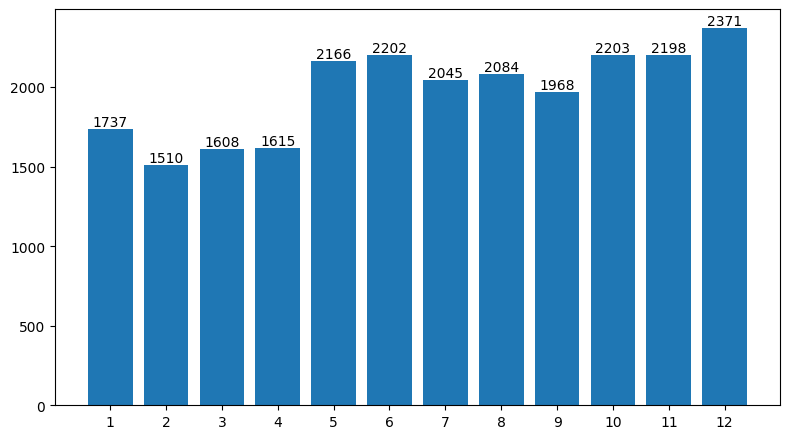

In [29]:
fig, axis = plt.subplots(figsize=(8,4.5))
#plotting code:
p = axis.bar(men, kiekis)
axis.bar_label(p)
axis.set_xticks(men)    #rankiniu budu nustatome stulpeliu zymes apacioje 

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [30]:
sql="""
SELECT  HOUR(CAST(dataLaikas AS TIME)) as valanda, count(*) as laikas
FROM EismIvyk2021
group by valanda;
"""
C.execute(sql)
ans = C.fetchall()
men, kiekis = list(map(list, zip(*ans)))

pout(ans)

Rodoma 5 eilutės iš 24
| 0 |       0        |      467       |
| 1 |       1        |      263       |
| 2 |       2        |      215       |
| 3 |       3        |      183       |
| 4 |       4        |      218       |


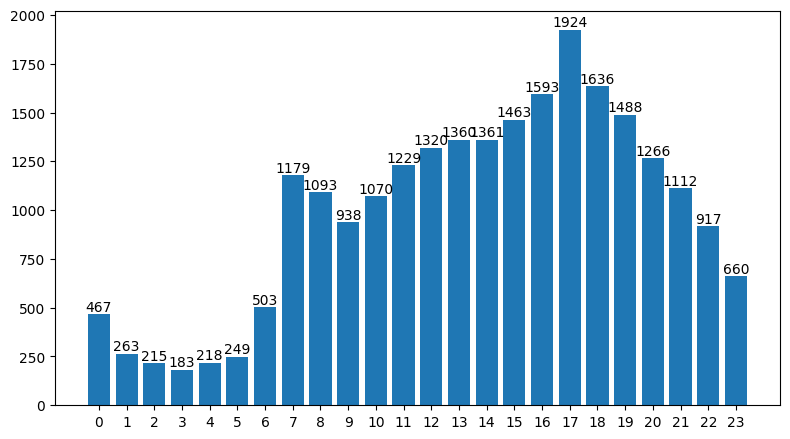

In [31]:
fig, axis = plt.subplots(figsize=(8,4.5))
#plotting code:
p = axis.bar(men, kiekis)
axis.bar_label(p)
axis.set_xticks(men)    #rankiniu budu nustatome stulpeliu zymes apacioje 

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [41]:
# kokie top 5 adrresai, kuriuose yra daugiausiai eimso įvykių?

# select ivykioVieta, count(*) as kartai from EismIvyk2021
# group by ivykioVieta
# order by kartai desc
# limit 5;

# kiek procentų nuo visų įvykių įvyko šiuose 5kiuose adresuose?


sql="""
WITH Top5 AS (
    SELECT ivykioVieta, COUNT(*) AS kartai
    FROM EismIvyk2021
    GROUP BY ivykioVieta
    ORDER BY kartai DESC
    LIMIT 5
),
Total AS (
    SELECT COUNT(*) AS total_kartai
    FROM EismIvyk2021
)
SELECT 
    t.ivykioVieta, 
    ROUND((t.kartai / total.total_kartai) * 100, 2) AS procentas
FROM Top5 t, Total total

UNION ALL

SELECT 
    'Kiti' AS ivykioVieta, 
    ROUND((COUNT(*) / total.total_kartai) * 100, 2) AS procentas
FROM EismIvyk2021, Total total
WHERE ivykioVieta NOT IN (SELECT ivykioVieta FROM Top5);
"""
C.execute(sql)
ans = C.fetchall()
ivykis, procentas = list(map(list, zip(*ans)))

pout(ans)


Rodoma 5 eilutės iš 6
| 0 |Klaipėda, Taikos|      0.17      |
| 1 |Vilnius, Ozo 25 |      0.17      |
| 2 |Vilnius, Geležin|      0.17      |
| 3 |Kaunas, Islandij|      0.16      |
| 4 |Kaunas, Karaliau|      0.13      |


In [42]:
print(ivykis)
print(kartai)

['Klaipėda, Taikos pr. 61', 'Vilnius, Ozo 25', 'Vilnius, Geležinio Vilko', 'Kaunas, Islandijos pl. 32', 'Kaunas, Karaliaus Mindaugo pr. 49', 'Kiti']
[41, 40, 40, 39, 31, 23516]


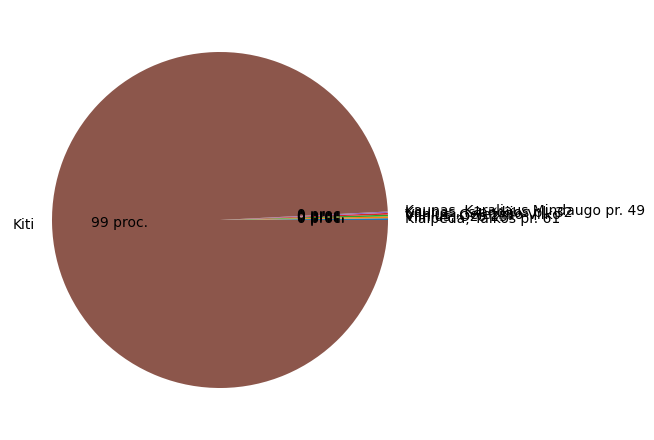

In [46]:
# a = [1,2,3,4]
# l = ['Vilnius', 'Kaunas', 'Klaipėda', 'Utena']
# e = [0.1, 0,0,0]

fig, axis = plt.subplots(figsize=(8,4.5))
#plotting code:
axis.pie(kartai,  labels=ivykis, autopct='%.0f proc.')

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [ ]:
# suraskite, kuriomis valandomis įvyksta daugiausiai susišaudymų? Vizualizuokite.
# Kuriomis valandomis (procentiškai) įvyksta daugiausiai mirtinų susišaudymų? Vizualizuokite.
# nypd lentelė
# BORO
# OCC_time
# works, nypd
# OCCUR_TIME
# STATISTICAL_MURDER_FALG jei 1, tai mirtinas įvykis





In [47]:
sql="""
select HOUR(OCCUR_TIME) as val, count(*) from nypd
group by val;
"""
C.execute(sql)
ans = C.fetchall()
ivykis, procentas = list(map(list, zip(*ans)))

pout(ans)

Rodoma 5 eilutės iš 24
| 0 |       0        |      1928      |
| 1 |       1        |      1877      |
| 2 |       2        |      1635      |
| 3 |       3        |      1468      |
| 4 |       4        |      1301      |


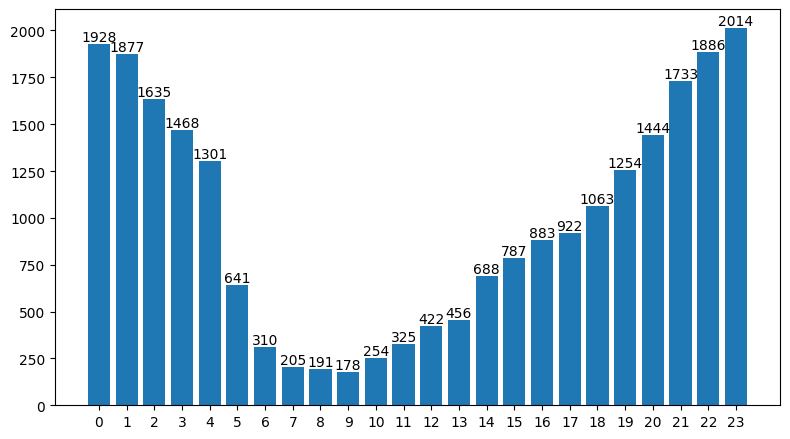

In [48]:
fig, axis = plt.subplots(figsize=(8,4.5))
#plotting code:
p = axis.bar(ivykis, procentas)
axis.bar_label(p)
axis.set_xticks(men)    #rankiniu budu nustatome stulpeliu zymes apacioje 

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [50]:
sql="""
SELECT 
    HOUR(OCCUR_TIME) as val, 
    COUNT(*) as ivykis, 
    SUM(STATISTICAL_MURDER_FLAG) as mirtis, 
    (SUM(STATISTICAL_MURDER_FLAG) / COUNT(*)) * 100 as procentas_mirtis_ivykis
FROM 
    nypd
GROUP BY 
    val;
"""
C.execute(sql)
ans = C.fetchall()
val, ivykis, mirtis, procentas  = list(map(list, zip(*ans)))

pout(ans)

Rodoma 5 eilutės iš 24
| 0 |       0        |      1928      |      329       |    17.0643     |
| 1 |       1        |      1877      |      328       |    17.4747     |
| 2 |       2        |      1635      |      285       |    17.4312     |
| 3 |       3        |      1468      |      261       |    17.7793     |
| 4 |       4        |      1301      |      253       |    19.4466     |


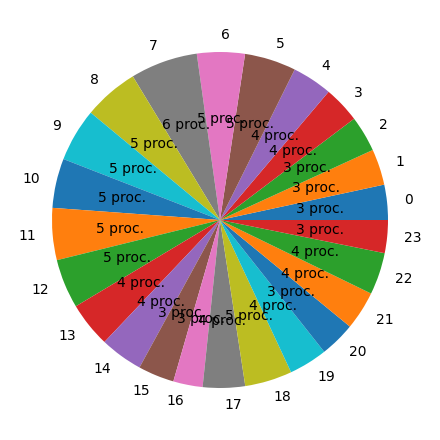

In [51]:
fig, axis = plt.subplots(figsize=(8,4.5))
#plotting code:
axis.pie(procentas,  labels=val, autopct='%.0f proc.')

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [ ]:
# turite informaciją apie užpuoliko lytį, amžiaus grupę, rasę, bei tą pačią infromaciją apie auką. 
# kokia vyraujanti aukos rasė, amžiaus grupė, lytis, užpuoliko amž grupė, rasė, lytis?
# Ar užpuolikai renkasi savo amžiaus, lyties, rasės aukas ar ne?



In [52]:
# classes, 
#pagal duotus nurodymus parasyti klase kuri nuskaitytu tekstinius failus 
#parasyti kodo eilutes kurios kreiptusi i faila, paimtu duomenis ir nubraizytu grafika 

#git komanda 
#web scrap 